In [9]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import os
from matplotlib import pyplot as plt

from sklearn.model_selection import KFold

In [10]:
import os


desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
capstone_data_path = os.path.join(desktop_path, 'CAPSTONE_DATA')

def find_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# This will search the entire CAPSTONE_DATA directory tree for CSV files
all_csv_files = find_csv_files(capstone_data_path)

# Print all .csv files found
print("CSV files found:", all_csv_files)



CSV files found: ['/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold4_trainX.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold2_testY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold2_testX.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold4_trainY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold1_trainX.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold1_trainY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold4_testX.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold4_testY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_binding_random_fold3_testY.csv', '/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK3/NEK3_1_uM_min_50_pct_binding_5fold_r

In [4]:
# Binding
import pandas as pd
from sklearn.model_selection import KFold
import os

nek_3 = ["3"]

for nek in nek_3:
    # Get training data
    data_path = "/Users/radhi/Desktop/CAPSTONE_DATA/scaled_descriptors"
    file_name =  "NEK3_1_uM_min_50_pct_binding_with_moe_descriptors.csv"
    file_path = os.path.join(data_path, file_name)

    # Check if the file exists before attempting to read
    if os.path.isfile(file_path):
        binding_df = pd.read_csv(file_path)
        print(binding_df.shape)

        # Continue with the rest of your processing here
        print(binding_df.active.value_counts())
        num_gap = (binding_df.loc[binding_df['active']==0].shape[0]) - (binding_df.loc[binding_df['active']==1].shape[0])
        print(num_gap)
        num_minority = binding_df.loc[binding_df['active']==1].shape[0]
        print(num_minority)

    # Separate majority and minority classes
        df_majority = binding_df[binding_df['active']==0]
        df_minority = binding_df[binding_df['active']==1]

        #=======================
        # Create 5-fold splits
        #=======================
        kf = KFold(n_splits=5, shuffle=True, random_state=0)

        # majority
        for i, (_, v_ind) in enumerate(kf.split(df_majority)):
            df_majority.loc[df_majority.index[v_ind], 'fold'] = f"fold{i+1}"

        # minority
        for i, (_, v_ind) in enumerate(kf.split(df_minority)):
            df_minority.loc[df_minority.index[v_ind], 'fold'] = f"fold{i+1}"


        print(df_majority['fold'].value_counts())
        print(df_minority['fold'].value_counts())


        # Concat
        all_fold_df = pd.concat([df_majority,df_minority])
        print(all_fold_df.shape)
        print(all_fold_df.active.value_counts())


        # Save to file
        split_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
            
            # Ensure this directory exists
        os.makedirs(split_path, exist_ok=True)

        all_fold_df.to_csv(os.path.join(split_path, file_name), index=False)
    else:
        print(f"File not found: {file_path}")

File not found: /Users/radhi/Desktop/CAPSTONE_DATA/scaled_descriptors/NEK3_1_uM_min_50_pct_binding_with_moe_descriptors.csv/_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv


In [12]:
# Separate majority and minority classes
df_majority = binding_df[binding_df['active']==0]
df_minority = binding_df[binding_df['active']==1]

print("Shape of the majority: ",df_majority.shape)
df_minority

Shape of the majority:  (1323, 310)


,compound_id,base_rdkit_smiles,active,ASA+_per_atom,ASA-,ASA_H_per_atom,ASA_P,ASA_per_atom,BCUT_PEOE_0,BCUT_PEOE_1,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol_per_atom,zagreb_per_atom,fold
1323,kdb_2255,Cc1cnc(Nc2ccc(C(=O)N3CCC([NH+]4CCCC4)CC3)cc2)n...,1,7.117087,221.54079,9.578810,59.609821,10.455425,-2.799085,-0.627536,...,138.875,33.250,14.375,5.000,0.000,0.00,4863,0.838235,2.911765,fold4
1324,kdb_2100,CN(C)C/C=C/C(=O)Nc1cccc(C(=O)Nc2ccc(Nc3nccc(-c...,1,7.324118,222.50867,7.467881,211.151350,10.140683,-2.664777,-0.641297,...,207.875,55.000,24.500,9.375,1.500,0.00,9015,0.822785,2.860759,fold3
1325,kdb_3070,COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccnc(Nc4ccnn4...,1,8.069657,191.67387,9.397749,118.482040,11.476381,-2.508749,-0.593688,...,127.875,31.125,14.125,4.625,0.875,0.00,3507,0.842105,2.912281,fold1
1326,kdb_2251,O=C(c1ccc(Nc2nccc(-c3cc4ccccc4s3)n2)cc1)N1CCC(...,1,7.952443,208.26131,9.430066,116.679160,11.225130,-2.799085,-0.664211,...,156.875,34.125,14.000,3.375,0.000,0.00,4574,0.830769,2.953846,fold2
1327,kdb_2363,CC(C)(C)c1ccc(C(=O)Nc2cn3cc(-c4cccnc4)ccc3n2)cc1,1,7.605750,224.61615,9.255347,142.136280,12.098073,-2.631217,-0.598044,...,99.625,17.125,6.375,1.625,0.000,0.00,2340,0.860000,3.040000,fold2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,kdb_2532,O=C1NC(=O)C(c2ccccc2Cl)=C1Nc1cccc(Cl)c1,1,6.836198,264.85251,10.641759,143.074550,15.112839,-2.262449,-0.641645,...,119.875,30.500,11.500,2.875,0.000,0.00,1013,1.062500,3.625000,fold2
1400,kdb_3053,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)C...,1,6.507985,213.30025,9.257843,134.728740,11.396395,-2.771649,-0.647159,...,178.125,58.125,27.500,12.000,3.875,0.25,4039,0.698413,2.666667,fold5
1401,kdb_3055,CS(=O)(=O)c1ccc(-c2cnc(N)c(C(=O)Nc3ccccc3)n2)cc1,1,8.074292,250.34798,9.024254,212.677520,14.088004,-2.418291,-0.632257,...,173.750,37.125,13.750,3.875,0.500,0.00,1811,0.952381,3.238095,fold3
1402,kdb_2093,CN(C)C/C=C/C(=O)Nc1cccc(C(=O)Nc2ccc(Nc3nccc(-c...,1,7.586464,226.39537,8.496118,172.172870,11.144931,-2.620964,-0.630059,...,206.625,55.250,19.375,6.250,0.125,0.00,5907,0.846154,2.953846,fold4


In [13]:
# Create 5-fold splits
# Use random_state=0
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# majority
for i, (_, v_ind) in enumerate(kf.split(df_majority)):
    df_majority.loc[df_majority.index[v_ind], 'fold'] = f"fold{i+1}"
    
df_majority['fold'].value_counts()

fold
fold1    265
fold2    265
fold3    265
fold4    264
fold5    264
Name: count, dtype: int64

In [14]:
# Binding
method = "binding"
nek_3 = ["3"]
foldAll = ["fold1","fold2","fold3","fold4","fold5"]

for nek in nek_3:
    # Get training data
    split_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
    random_df = pd.read_csv(split_path+"/NEK"+nek+"_1_uM_min_50_pct_binding_5fold_random_imbalanced.csv")
    random_df.head

    moe_columns = random_df.columns[3:]
    moe_columns = moe_columns[:-1]
    moe_columns

    # Use the fold 0 as the test set, fold 1,2,3,4 as the train set
    for fold in foldAll:
        test_moe_df = random_df.loc[random_df['fold'] == fold]
        train_moe_df = random_df.loc[random_df['fold'] != fold]
        print(test_moe_df.shape)
        print(train_moe_df.shape)

        test_x_df = test_moe_df[moe_columns]
        test_y_df = test_moe_df['active']
        print(test_x_df)
        print(test_y_df.value_counts())

        train_x_df = train_moe_df[moe_columns]
        train_y_df = train_moe_df['active']
        print(train_x_df.shape)
        print(train_y_df.value_counts())


        # Save to file
        uq_path = "/Users/radhi/Desktop/CAPSTONE_DATA/NEK_data_4Berkeley/NEK" + nek
        #uq_path = "/p/lustre2/fan4/myGPyTorch/classification_NEK/data/"

        train_x_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_trainX.csv", index=False)
        train_y_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_trainY.csv", index=False)
        test_x_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_testX.csv", index=False)
        test_y_df.to_csv(uq_path+"/NEK"+nek+"_binding_random_"+fold+"_testY.csv", index=False)





(282, 310)
(1122, 310)
      ASA+_per_atom       ASA-  ASA_H_per_atom      ASA_P  ASA_per_atom  \
1         10.215013  142.21526        6.836120  244.47214     15.890644   
5          7.736764  220.71700        7.970176  205.31177     11.080960   
8          8.211856  304.34698        8.814355  271.20950     13.745438   
9          8.901980  195.95447        8.445429  222.74628     13.395346   
14         7.612832  287.15073        9.292597  194.76367     12.833755   
...             ...        ...             ...        ...           ...   
1380      10.206247  174.56108       11.438849  117.39546     13.786759   
1384       8.224840  221.81551       10.469413  138.76630     14.219854   
1394       8.642949  161.90437        8.153549  186.68533     12.940353   
1396       7.236550  241.08192        7.003955  254.33978     11.466057   
1397       8.511531  277.76974        8.521127  280.75598     13.279703   

      BCUT_PEOE_0  BCUT_PEOE_1  BCUT_PEOE_2  BCUT_PEOE_3  \
1       -2.19415

In [15]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# check version number
import imblearn
print("imblearn version: ",imblearn.__version__)
from imblearn.over_sampling import SMOTE


# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
imblearn version:  0.12.0


In [16]:
# confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# from sklearn 0.19.2 documentation:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
# PCA

x_df = pd.concat([train_x_df, test_x_df])

# PCA
# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(x_df)
Scaled_data=scaling.transform(x_df)
train_scaled_data = scaling.transform(train_x_df)
test_scaled_data = scaling.transform(test_x_df)

# Set the n_components=3
# 95% variance
principal=PCA(n_components=0.95)
principal.fit(Scaled_data)
pca_train_x_df=principal.transform(train_scaled_data)
pca_test_x_df=principal.transform(test_scaled_data)

print(pca_train_x_df.shape)
print(pca_test_x_df.shape)



(1124, 67)
(280, 67)


In [18]:
# SMOTE

# SMOTE: Adjust imbalanced training data

# transform the dataset
oversample = SMOTE()
new_train_x_df, new_train_y_df = oversample.fit_resample(pca_train_x_df, train_y_df)



In [19]:
# Transform data to PyTorch tensors

# PCA then SMOTE
train_x_temp = new_train_x_df.astype("long")
train_y_temp = new_train_y_df.to_numpy().astype("long")

# PCA
test_x_temp = pca_test_x_df.astype("long")


test_y_temp = test_y_df.to_numpy().astype("long")

train_x = torch.from_numpy(train_x_temp)
train_y = torch.from_numpy(train_y_temp)
test_x = torch.from_numpy(test_x_temp)
test_y = torch.from_numpy(test_y_temp)


print(train_x.shape)
print(train_y.shape)

torch.Size([2118, 67])
torch.Size([2118])


In [20]:
# Construct a GP classification model

from gpytorch.models import ExactGP
from gpytorch.likelihoods import DirichletClassificationLikelihood
from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel

# We will use the simplest form of GP model, exact inference
class DirichletGPModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood, num_classes):
        super(DirichletGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean(batch_shape=torch.Size((num_classes,)))
        self.covar_module = ScaleKernel(
            RBFKernel(batch_shape=torch.Size((num_classes,))),
            batch_shape=torch.Size((num_classes,)),
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
# we let the DirichletClassificationLikelihood compute the targets for us
likelihood = DirichletClassificationLikelihood(train_y, learn_additional_noise=True)
model = DirichletGPModel(train_x, likelihood.transformed_targets, likelihood, num_classes=likelihood.num_classes)


In [21]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 300


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, likelihood.transformed_targets).sum()
    loss.backward()
    if i % 5 == 0:
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            i + 1, training_iter, loss.item(),
            model.covar_module.base_kernel.lengthscale.mean().item(),
            model.likelihood.second_noise_covar.noise.mean().item()
        ))
    optimizer.step()

Iter 1/300 - Loss: 7.023   lengthscale: 0.693   noise: 0.693
Iter 6/300 - Loss: 6.268   lengthscale: 0.975   noise: 0.971
Iter 11/300 - Loss: 5.707   lengthscale: 1.322   noise: 1.284
Iter 16/300 - Loss: 5.285   lengthscale: 1.730   noise: 1.573
Iter 21/300 - Loss: 4.981   lengthscale: 2.199   noise: 1.768
Iter 26/300 - Loss: 4.755   lengthscale: 2.708   noise: 1.828
Iter 31/300 - Loss: 4.582   lengthscale: 3.228   noise: 1.755
Iter 36/300 - Loss: 4.418   lengthscale: 3.740   noise: 1.573
Iter 41/300 - Loss: 4.281   lengthscale: 4.233   noise: 1.314
Iter 46/300 - Loss: 4.146   lengthscale: 4.694   noise: 1.022
Iter 51/300 - Loss: 4.023   lengthscale: 5.103   noise: 0.741
Iter 56/300 - Loss: 3.945   lengthscale: 5.448   noise: 0.506
Iter 61/300 - Loss: 3.880   lengthscale: 5.724   noise: 0.333
Iter 66/300 - Loss: 3.820   lengthscale: 5.936   noise: 0.220
Iter 71/300 - Loss: 3.781   lengthscale: 6.094   noise: 0.151
Iter 76/300 - Loss: 3.757   lengthscale: 6.208   noise: 0.109
Iter 81/30

In [22]:
# Make predictions with the model

model.eval()
likelihood.eval()

with gpytorch.settings.fast_pred_var(), torch.no_grad():
    test_dist = model(train_x)
    pred_means = test_dist.loc
    observed_pred = likelihood(model(train_x))

print(pred_means.numpy().shape)
print(pred_means.max(0)[1])

(2, 2118)
tensor([0, 0, 0,  ..., 1, 1, 1])


/Users/radhi/miniconda3/envs/atom2024/lib/python3.9/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


Confusion matrix, without normalization
[[1057    2]
 [   0 1059]]


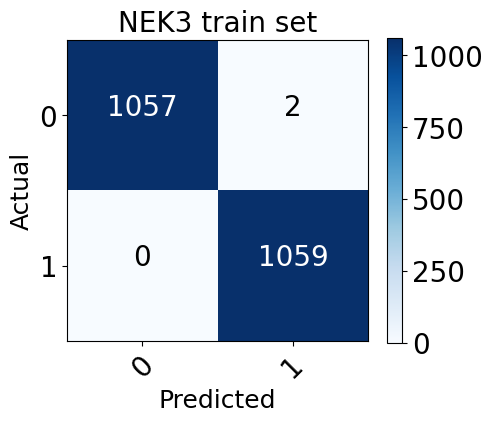

In [23]:
train_prediction = model(train_x).loc.max(0)[1].numpy()
y_true = new_train_y_df.values
y_pred = train_prediction
train_cm = confusion_matrix(y_true, y_pred)
class_names = ["0","1"]

plt.rcParams.update({"font.size": 20})
label_font = {'size':'18'}  # Adjust to fit
ax = plt.figure(figsize=(5,5))
plt.title("NEK3 train set",fontsize=20)
plot_confusion_matrix(train_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted",fontdict=label_font);
plt.ylabel("Actual",fontdict=label_font);


In [24]:
# Make predictions with the model
# Prediction on the test set

model.eval()
likelihood.eval()

with gpytorch.settings.fast_pred_var(), torch.no_grad():
    test_dist = model(test_x)
    test_pred_means = test_dist.loc
    test_pred = likelihood(model(test_x))
    
print(test_pred_means.numpy().shape)
print(test_pred_means.max(0)[1])

(2, 280)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])


In [25]:
test_prediction = model(test_x).loc.max(0)[1].numpy()
print(test_prediction.shape)
test_prediction

(280,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [26]:
print(y_true.shape)
y_true

(2118,)


array([0, 0, 0, ..., 1, 1, 1])

Confusion matrix, without normalization
[[260   4]
 [ 13   3]]


Text(29.47222222222222, 0.5, 'Actual')

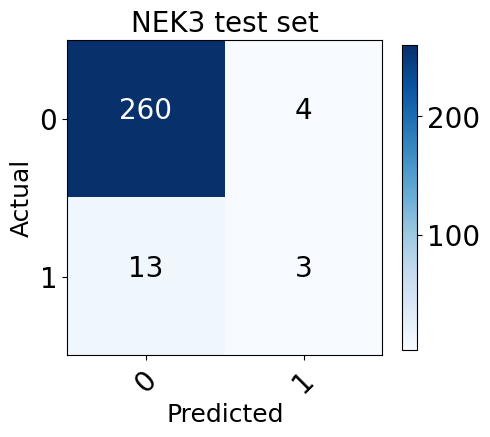

In [27]:
y_true = test_y_df.values
y_pred = test_prediction
test_cm = confusion_matrix(y_true, y_pred)
class_names = ["0","1"]

plt.rcParams.update({"font.size": 20})
label_font = {'size':'18'}  # Adjust to fit
ax = plt.figure(figsize=(5,5))
plt.title("NEK3 test set",fontsize=20)
plot_confusion_matrix(test_cm, classes=class_names, normalize=False)
plt.xlabel("Predicted",fontdict=label_font)
plt.ylabel("Actual",fontdict=label_font)


In [28]:
lower, upper = observed_pred.confidence_region()
upper

tensor([[ 2.9540,  3.0573,  3.1882,  ..., -2.2843, -1.9314, -1.7286],
        [-0.7798, -0.3735, -0.6679,  ...,  1.8182,  2.0404,  2.0924]])

In [29]:
observed_pred.mean.numpy()

array([[-0.39786646, -0.513368  , -0.41576433, ..., -6.7805624 ,
        -6.6113343 , -6.5103183 ],
       [-5.9739013 , -5.9102154 , -6.2611966 , ..., -0.16379118,
        -0.3208642 , -0.353621  ]], dtype=float32)

In [30]:
print(observed_pred.variance.numpy().shape)
observed_pred.variance.numpy()

(2, 2118)


array([[2.808753 , 3.1874888, 3.2470622, ..., 5.0540586, 5.475534 ,
        5.7162876],
       [6.7447567, 7.6636863, 7.8211155, ..., 0.9820675, 1.3939264,
        1.4957924]], dtype=float32)

In [31]:
print(pred_means.numpy())

[[-0.39786646 -0.513368   -0.41576433 ... -6.7805624  -6.6113343
  -6.5103183 ]
 [-5.9739013  -5.9102154  -6.2611966  ... -0.16379118 -0.3208642
  -0.353621  ]]


In [32]:
# Draw samples from the posterior.
pred_samples = test_dist.sample(torch.Size((256,))).exp()
probabilities = (pred_samples / pred_samples.sum(-2, keepdim=True)).mean(0)
print(probabilities.shape)
probabilities


torch.Size([2, 280])


tensor([[0.9322, 0.9938, 0.9065, 0.9808, 0.9060, 0.9819, 0.9844, 0.9900, 0.9402,
         0.8994, 0.9823, 0.9033, 0.9544, 0.9693, 0.9794, 0.9022, 0.9585, 0.9850,
         0.9450, 0.9861, 0.8710, 0.9812, 0.9893, 0.9376, 0.9834, 0.9716, 0.8278,
         0.9053, 0.9573, 0.9728, 0.7619, 0.9911, 0.7537, 0.9860, 0.9725, 0.9769,
         0.9568, 0.9859, 0.9867, 0.7730, 0.9766, 0.6810, 0.9054, 0.9430, 0.9607,
         0.9859, 0.9870, 0.9666, 0.9809, 0.9685, 0.9775, 0.5397, 0.8864, 0.9605,
         0.9096, 0.9718, 0.9842, 0.9529, 0.9130, 0.9832, 0.9334, 0.9801, 0.9884,
         0.8403, 0.8508, 0.9495, 0.9400, 0.9651, 0.5366, 0.9744, 0.9017, 0.9856,
         0.8730, 0.9932, 0.9890, 0.9669, 0.9818, 0.8334, 0.8965, 0.9881, 0.9495,
         0.5944, 0.9745, 0.9866, 0.9765, 0.9480, 0.9868, 0.9761, 0.2134, 0.9698,
         0.9897, 0.9713, 0.8996, 0.5141, 0.9846, 0.4236, 0.9941, 0.9811, 0.9938,
         0.3231, 0.9956, 0.7540, 0.9717, 0.9174, 0.9507, 0.9785, 0.9964, 0.9610,
         0.8176, 0.9782, 0.8

In [33]:
probabilities.shape

torch.Size([2, 280])

In [34]:
df_prob = pd.DataFrame(probabilities)
df_prob

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0.932227,0.993817,0.90648,0.98084,0.90597,0.981861,0.984387,0.989958,0.94017,0.899441,...,0.587755,0.43982,0.801249,0.642,0.961915,0.924089,0.142164,0.48391,0.916878,0.602562
1,0.067773,0.006183,0.09352,0.01916,0.09403,0.018139,0.015613,0.010042,0.05983,0.100559,...,0.412245,0.56018,0.198751,0.358,0.038085,0.075911,0.857836,0.51609,0.083122,0.397438


In [35]:
# Ensure y_true and y_pred are numpy arrays (if they're not already)
y_true = np.array(y_true).flatten()  # Replace with your actual data
y_pred = np.array(y_pred).flatten()  # Replace with your actual data

# Check for any NaN or infinite values and remove them or handle them appropriately
if np.any(np.isnan(y_true)) or np.any(np.isnan(y_pred)):
    raise ValueError("NaN values found in y_true or y_pred")

if np.any(np.isinf(y_true)) or np.any(np.isinf(y_pred)):
    raise ValueError("Infinite values found in y_true or y_pred")

# Now you can compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)


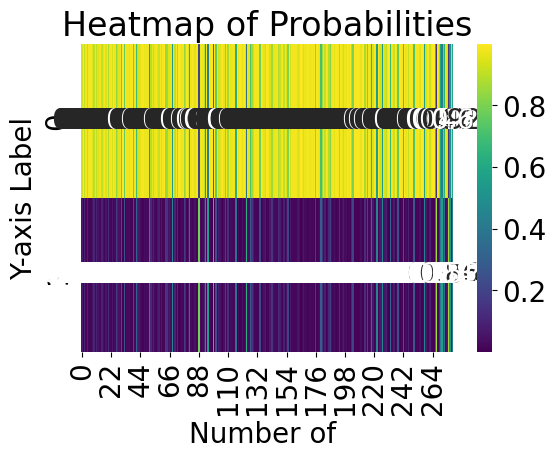

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn to create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(probabilities, annot=True, cmap='viridis')
plt.title('Heatmap of Probabilities')
plt.xlabel('Number of ')
plt.ylabel('Y-axis Label')
plt.show()

(2, 2118)


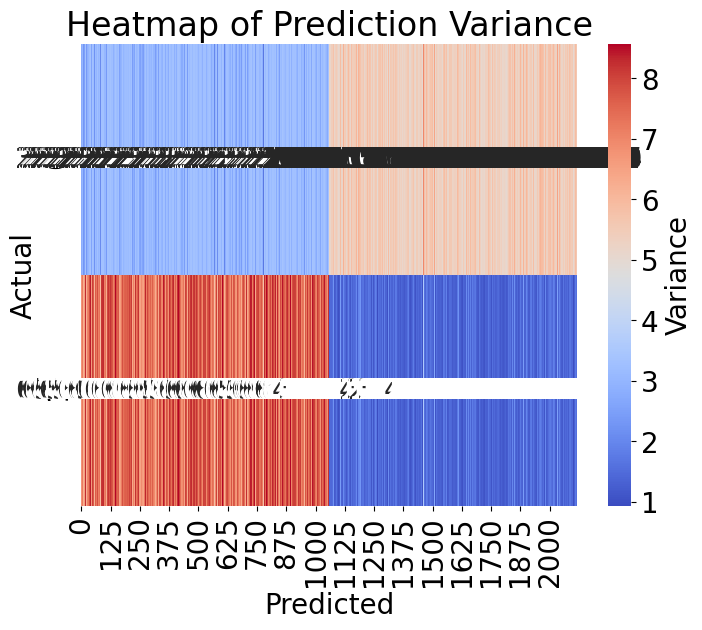

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


print(observed_pred.variance.numpy().shape)
observed_pred.variance.numpy()

variance_data = observed_pred.variance.numpy()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(variance_data, annot=True, fmt='f', cmap='coolwarm', cbar_kws={'label': 'Variance'})
plt.title('Heatmap of Prediction Variance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [38]:
test_pred.mean.numpy()

array([[-9.15700912e-01, -3.31442058e-02, -1.11786497e+00,
        -3.96287233e-01, -1.15691924e+00, -3.17311078e-01,
        -3.28244090e-01, -1.09649286e-01, -1.04167449e+00,
        -1.04743540e+00, -1.15839928e-01, -1.28523958e+00,
        -6.53997302e-01, -3.84877890e-01, -4.90518749e-01,
        -1.35507071e+00, -5.67613363e-01, -2.48833865e-01,
        -8.15866470e-01, -2.17975587e-01, -9.73551869e-01,
        -2.30225980e-01, -1.42776698e-01, -1.14516485e+00,
        -3.39574903e-01, -3.50253284e-01, -1.63431215e+00,
        -7.46847153e-01, -9.09909248e-01, -3.14671278e-01,
        -1.90276551e+00, -1.32722557e-02, -2.13003778e+00,
        -1.93225294e-01, -4.70601708e-01, -4.88327295e-01,
        -6.72278285e-01, -2.65626520e-01, -7.71091282e-02,
        -1.96496940e+00, -2.28632867e-01, -2.17722631e+00,
        -1.12514055e+00, -8.20459485e-01, -6.31712079e-01,
        -2.03996882e-01, -9.38196480e-02, -5.47500372e-01,
        -4.17807817e-01, -5.15476942e-01, -3.70608687e-0

In [39]:
print(test_pred.variance.numpy().shape)
test_pred.variance.numpy()
test_pred_variance2D = test_pred.variance.numpy()
test_pred_variance2D

(2, 280)


array([[2.394    , 2.500861 , 2.5473526, 2.3816411, 2.3203645, 2.610407 ,
        2.4817724, 2.6464136, 2.5950048, 2.5442784, 2.5902815, 2.5249832,
        2.3441956, 2.672906 , 2.5660057, 2.503195 , 2.3012085, 2.6391013,
        2.4219446, 2.4460652, 1.7592801, 2.674574 , 2.6690383, 2.5099373,
        2.6028197, 2.668725 , 2.4835207, 1.7170854, 2.5579038, 2.6699011,
        1.8192865, 2.2933297, 2.311184 , 2.6736927, 2.4057624, 2.6397572,
        2.2013464, 2.3099523, 2.6382813, 1.709987 , 2.6085908, 2.207367 ,
        2.4352067, 2.630602 , 2.5649176, 2.670425 , 2.6180317, 1.8449732,
        2.6423945, 2.4482665, 2.671006 , 1.8844573, 2.5956194, 2.501952 ,
        2.4306004, 2.6588879, 2.2364445, 2.6032774, 2.54333  , 2.6585307,
        2.4978657, 2.6742647, 2.6656208, 1.8513783, 2.346041 , 2.6638067,
        2.2890437, 2.6633012, 2.1063948, 2.661866 , 2.4075234, 2.6719694,
        2.3503065, 2.315123 , 2.5791428, 2.6281567, 2.4935477, 2.4815557,
        1.3969084, 2.542674 , 2.451917

In [40]:
df_test_var = pd.DataFrame(test_pred_variance2D)
df_test_var.shape

(2, 280)

In [41]:
var_min = test_pred_variance2D.min(axis=0).min()
var_max = test_pred_variance2D.max(axis=0).max()
print(var_min, var_max)

1.2784964 3.9532177


In [42]:
# Training set variance
print(observed_pred.variance.numpy().shape)
observed_pred.variance.numpy()

(2, 2118)


array([[2.808753 , 3.1874888, 3.2470622, ..., 5.0540586, 5.475534 ,
        5.7162876],
       [6.7447567, 7.6636863, 7.8211155, ..., 0.9820675, 1.3939264,
        1.4957924]], dtype=float32)

In [43]:
# Using test prediction as index to extract prediction variance
test_pred_variance = [test_pred_variance2D[value][idx] for idx,value in enumerate(test_prediction)]
test_pred_variance

[2.394,
 2.500861,
 2.5473526,
 2.3816411,
 2.3203645,
 2.610407,
 2.4817724,
 2.6464136,
 2.5950048,
 2.5442784,
 2.5902815,
 2.5249832,
 2.3441956,
 2.672906,
 2.5660057,
 2.503195,
 2.3012085,
 2.6391013,
 2.4219446,
 2.4460652,
 1.7592801,
 2.674574,
 2.6690383,
 2.5099373,
 2.6028197,
 2.668725,
 2.4835207,
 1.7170854,
 2.5579038,
 2.6699011,
 1.8192865,
 2.2933297,
 2.311184,
 2.6736927,
 2.4057624,
 2.6397572,
 2.2013464,
 2.3099523,
 2.6382813,
 1.709987,
 2.6085908,
 2.207367,
 2.4352067,
 2.630602,
 2.5649176,
 2.670425,
 2.6180317,
 1.8449732,
 2.6423945,
 2.4482665,
 2.671006,
 1.8844573,
 2.5956194,
 2.501952,
 2.4306004,
 2.6588879,
 2.2364445,
 2.6032774,
 2.54333,
 2.6585307,
 2.4978657,
 2.6742647,
 2.6656208,
 1.8513783,
 2.346041,
 2.6638067,
 2.2890437,
 2.6633012,
 2.1063948,
 2.661866,
 2.4075234,
 2.6719694,
 2.3503065,
 2.315123,
 2.5791428,
 2.6281567,
 2.4935477,
 2.4815557,
 1.3969084,
 2.542674,
 2.451917,
 1.7016152,
 2.6418698,
 2.674467,
 2.499509,
 2.043

In [44]:
display(np.arange(len(y_true)).shape)
display((y_true - test_prediction).shape)
display(y_true.shape)
display(test_prediction.shape)

(280,)

(280,)

(280,)

(280,)

/var/folders/5p/_w9hrx997yb7f1_y_4_4k4bw0000gn/T/ipykernel_16116/1250830945.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu').reversed()


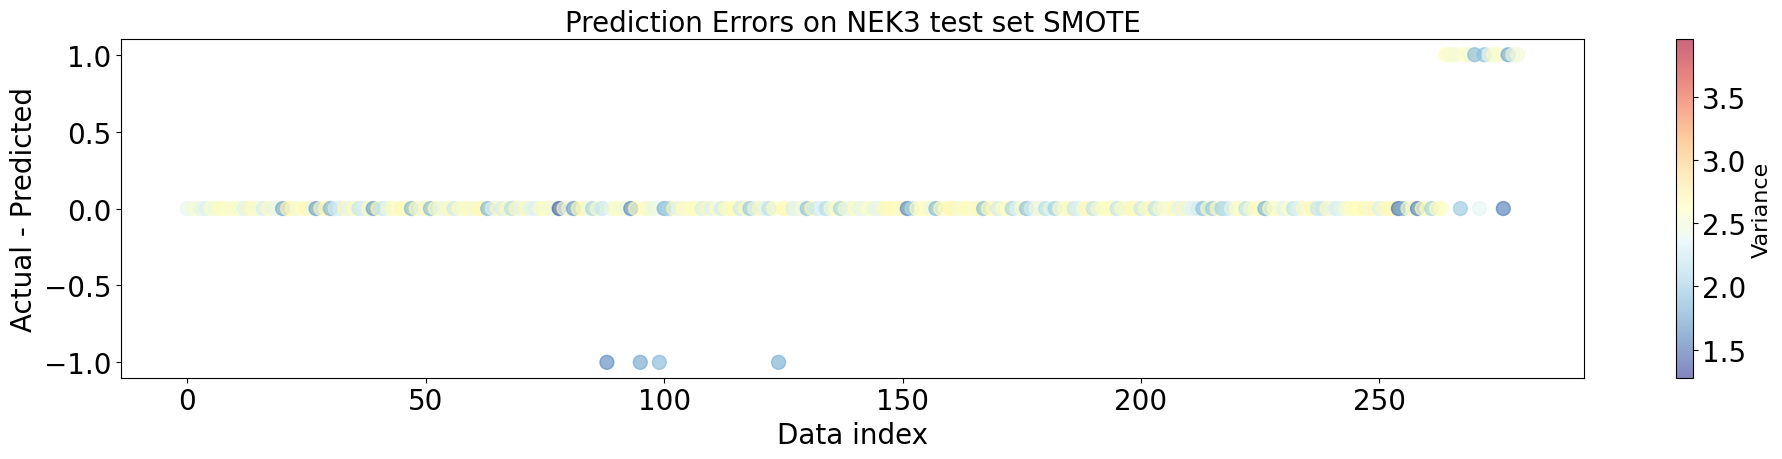

In [45]:
plt.rcParams.update({"font.size": 20})

marker = ['s', 'o', 'D', 'v']
cm = plt.cm.get_cmap('RdYlBu').reversed() 

fig = plt.figure(figsize=(20,5))

plt.title("Prediction Errors on NEK3 test set SMOTE",fontsize=20)

sc=plt.scatter(np.arange(len(y_true)),(y_true - test_prediction), c=test_pred_variance, s=100, cmap=cm, alpha=0.6,vmin=var_min, vmax=var_max)

clb=plt.colorbar()
clb.set_label('Variance',fontsize=16)
plt.xlabel('Data index')
plt.ylabel('Actual - Predicted')
fig.tight_layout()

plt.show()

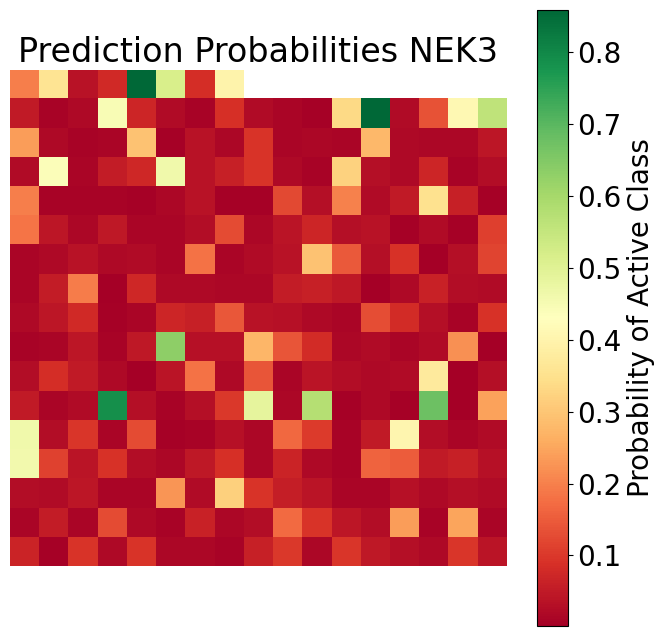

In [46]:
import matplotlib.pyplot as plt
import numpy as np

probabilities_np = probabilities.numpy()

active_probabilities = probabilities_np[1, :]


num_samples = active_probabilities.shape[0]
side_length = int(np.ceil(np.sqrt(num_samples)))  # Calculate the side length of the grid

# Create a 2D array filled with NaNs (to be ignored in the plot)
grid_data = np.full((side_length, side_length), np.nan)

# Fill the grid with the active probabilities
# Flatten the grid (if needed) and assign probabilities (ensures alignment even if not a perfect square)
grid_data.flat[:num_samples] = active_probabilities

# Plotting
plt.figure(figsize=(8, 8))
plt.imshow(grid_data, cmap='RdYlGn', origin='lower', aspect='equal')
plt.colorbar(label='Probability of Active Class')
plt.title('Prediction Probabilities NEK3')
plt.axis('off')  # Turn off the axis for a clean look

plt.show()

In [47]:
var_min = test_pred_variance2D.min(axis=0).min()
var_max = test_pred_variance2D.max(axis=0).max()
print(var_min, var_max)

1.2784964 3.9532177


In [48]:
# # Initialize an empty DataFrame
# variance_cm_class_test = pd.DataFrame(columns=['TP', 'TN', 'FP', 'FN'], index=['0', '1'])

# # Extract variances for each category
# # True Positives: Class 1 predicted as Class 1
# variance_cm_class_test.at['1', 'TP'] = test_pred_variance2D[1, 1]

# # True Negatives: Class 0 predicted as Class 0
# variance_cm_class_test.at['0', 'TN'] = test_pred_variance2D[0, 0]

# # False Positives: Class 0 predicted as Class 1
# variance_cm_class_test.at['0', 'FP'] = test_pred_variance2D[0, 1]

# # False Negatives: Class 1 predicted as Class 0
# variance_cm_class_test.at['1', 'FN'] = test_pred_variance2D[1, 0]

# print(variance_cm_class_test)
# variance_cm_class_test.shape

In [49]:
test_pred_variance2D.shape

(2, 280)

In [50]:
categories = []

for true, pred in zip(y_true, test_prediction):
    if true == 1 and pred == 1:
        categories.append('6') #TP
    elif true == 1 and pred == 0: 
        categories.append('7') # FN
    elif true == 0 and pred == 1: 
        categories.append('8') # FP
    elif true == 0 and pred == 0:
        categories.append('9') #TN

categories = np.array(categories)  # Convert the list to a numpy array


In [51]:
categories

array(['9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '8', '9', '9',
       '9', '9', '9', '9', '8', '9', '9', '9', '8', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '8', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9

In [52]:
# Using test prediction as index to extract prediction variance
test_pred_variance = [test_pred_variance2D[value][idx] for idx,value in enumerate(test_prediction)]
test_pred_variance = np.array(test_pred_variance)

test_pred_variance

array([2.394    , 2.500861 , 2.5473526, 2.3816411, 2.3203645, 2.610407 ,
       2.4817724, 2.6464136, 2.5950048, 2.5442784, 2.5902815, 2.5249832,
       2.3441956, 2.672906 , 2.5660057, 2.503195 , 2.3012085, 2.6391013,
       2.4219446, 2.4460652, 1.7592801, 2.674574 , 2.6690383, 2.5099373,
       2.6028197, 2.668725 , 2.4835207, 1.7170854, 2.5579038, 2.6699011,
       1.8192865, 2.2933297, 2.311184 , 2.6736927, 2.4057624, 2.6397572,
       2.2013464, 2.3099523, 2.6382813, 1.709987 , 2.6085908, 2.207367 ,
       2.4352067, 2.630602 , 2.5649176, 2.670425 , 2.6180317, 1.8449732,
       2.6423945, 2.4482665, 2.671006 , 1.8844573, 2.5956194, 2.501952 ,
       2.4306004, 2.6588879, 2.2364445, 2.6032774, 2.54333  , 2.6585307,
       2.4978657, 2.6742647, 2.6656208, 1.8513783, 2.346041 , 2.6638067,
       2.2890437, 2.6633012, 2.1063948, 2.661866 , 2.4075234, 2.6719694,
       2.3503065, 2.315123 , 2.5791428, 2.6281567, 2.4935477, 2.4815557,
       1.3969084, 2.542674 , 2.451917 , 1.7016152, 

In [53]:
#first you want to compare the predicted list with the actual list - they should be the same length and 1D 
#use that to make a list of the categorized values (TN,FN,TP,FP) - this resulting list should be somthing like [TN,FN,TP...] 
# ^^ of the same length of the prediction and actual lists (can encode maybe as 0,1,2,3?) - dont use strings
#TN = 0, FN = 1, etc. [] create a hash {TN: 4, FN: 5, }
# now you want to plot confidence against the labels (TN, FN , vagera vagera)  
# so you have to look at ur confidence list which is something like [[confidence for 0], [confidence for 1]]
# so you would basically iterate through the confidence list in the length dimension (same as actual and prediction)
# then you would access the value of the confidence based off predicted value 

# plotData = {TN: [], FN: [], TP, FP}

# for i in range(len(predicted)): 
#     predictedResult = predicted[i]; either 0 or 1
#     labelResult = labelList[i]; #this was made by comparing predicted against actual
#     confidenceVal = confidence[predictedResult][i] # because this corresponds with the confidence in its predicted value
#     plotData[labelResult].append(confidenceVal) #this is saying get the correspond list from the plot data and push this conf val to the CORRECT list 

#plot ur plot data!! 




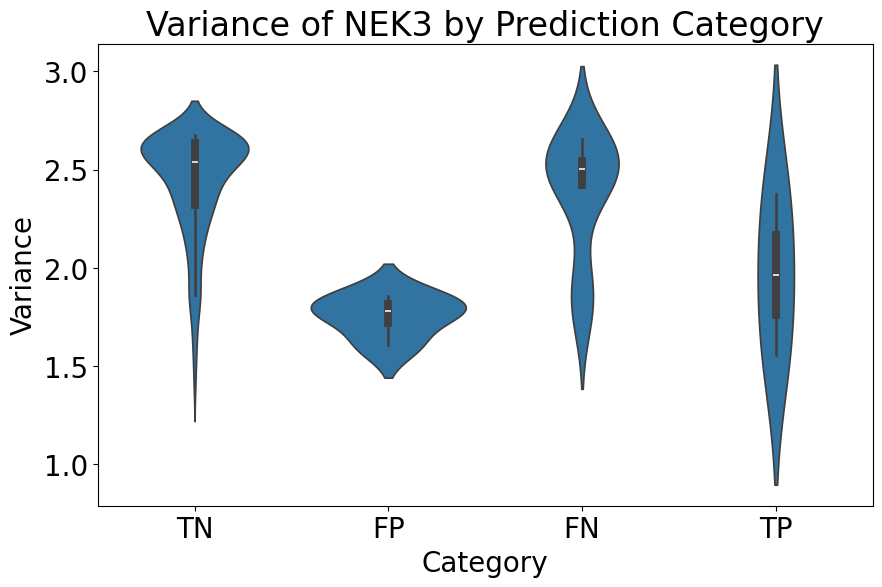

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the categories and variances
data = pd.DataFrame({
    'Category': categories,
    'Variance': test_pred_variance
})

# Replace numeric categories with labels for clarity
category_labels = {'6': 'TP', '7': 'FN', '8': 'FP', '9': 'TN'}
data['Category'] = data['Category'].replace(category_labels)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size of the plot as needed
sns.violinplot(x='Category', y='Variance', data=data)

# Setting plot title and labels
plt.title('Variance of NEK3 by Prediction Category')
plt.xlabel('Category')
plt.ylabel('Variance')

plt.show()


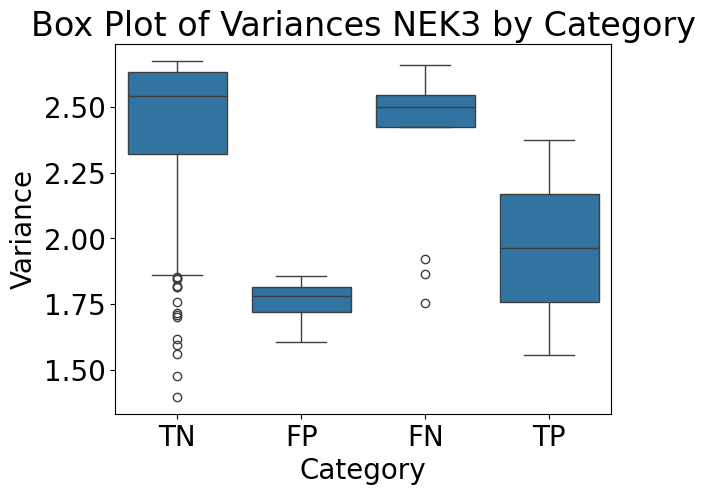

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Category', y='Variance', data=data)
plt.title('Box Plot of Variances NEK3 by Category')
plt.show()


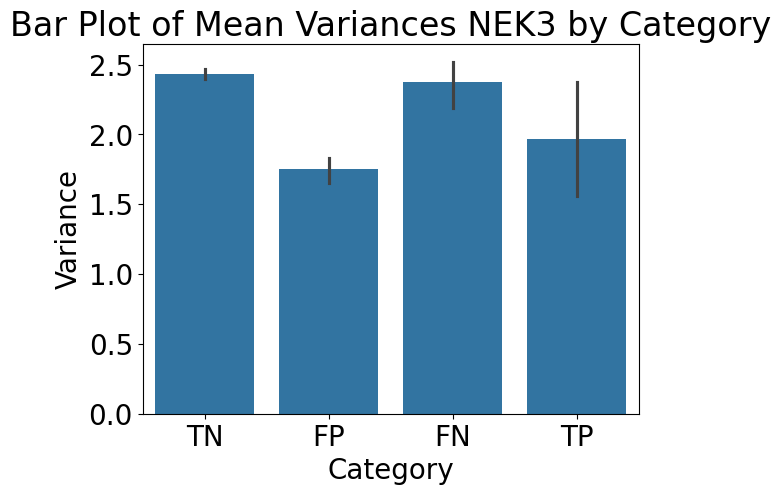

In [56]:
sns.barplot(x='Category', y='Variance', data=data, estimator=np.mean)
plt.title('Bar Plot of Mean Variances NEK3 by Category')
plt.show()


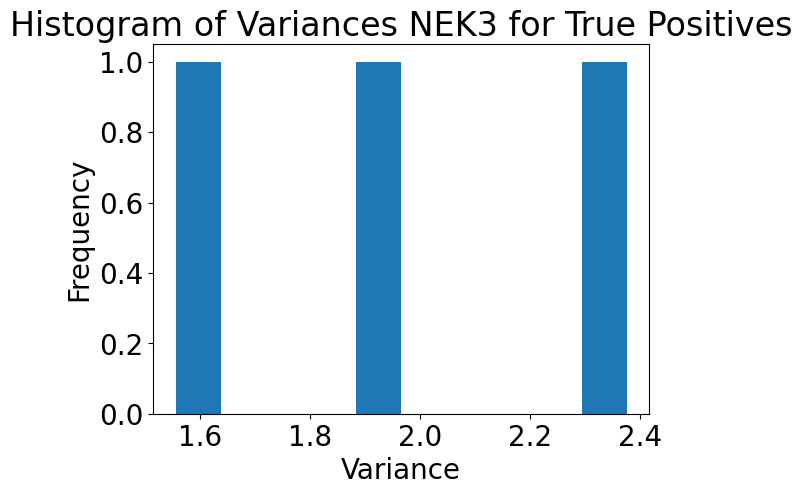

In [57]:
plt.hist(data[data['Category'] == 'TP']['Variance'], bins=10)
plt.title('Histogram of Variances NEK3 for True Positives')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()


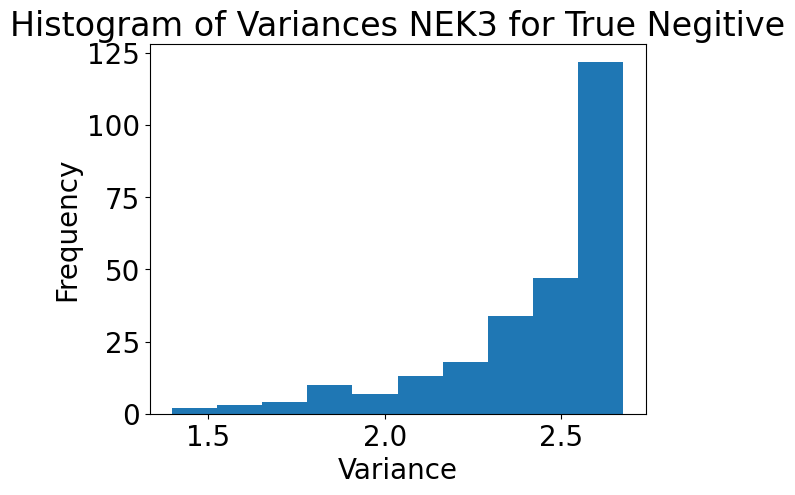

In [58]:
plt.hist(data[data['Category'] == 'TN']['Variance'], bins=10)
plt.title('Histogram of Variances NEK3 for True Negitive')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()


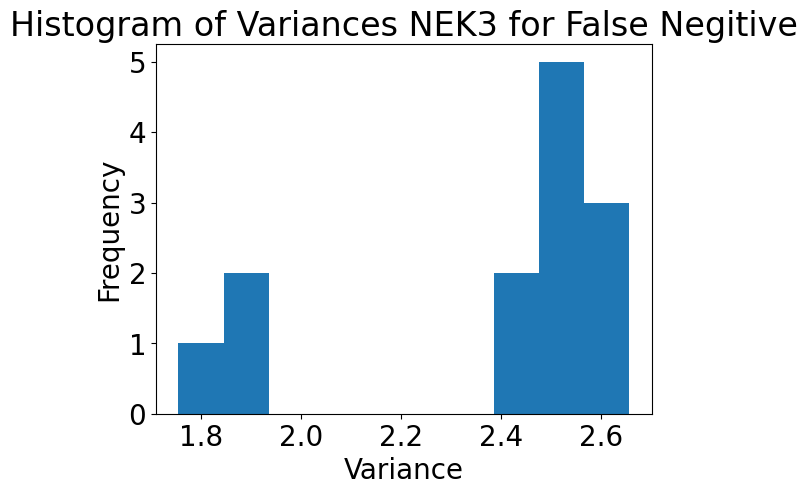

In [59]:
plt.hist(data[data['Category'] == 'FN']['Variance'], bins=10)
plt.title('Histogram of Variances NEK3 for False Negitive')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()


/Users/radhi/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/radhi/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


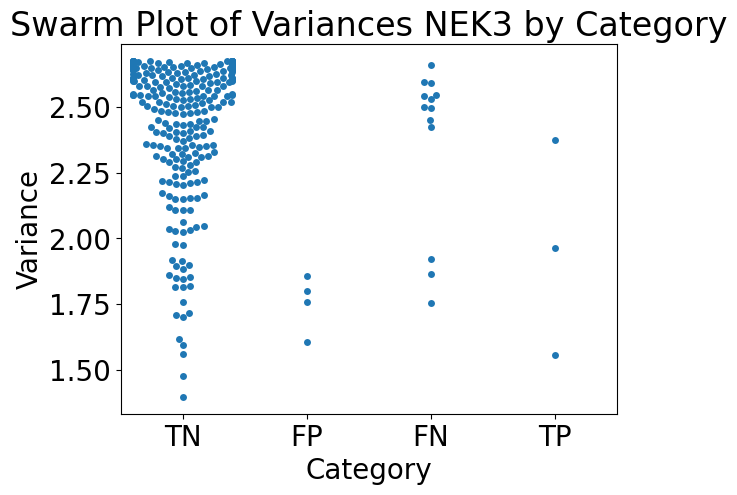

In [60]:
sns.swarmplot(x='Category', y='Variance', data=data)
plt.title('Swarm Plot of Variances NEK3 by Category')
plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
